# run in terminal b4hand: 
1. `ctrl+c jupyter notebook`
2. `pyenv activate music` 
3. `R -e 'IRkernel::installspec()'`
4. `restart jupyter notebook`

In [1]:
# library imports
require(ggplot2)
require(reshape2)

# data imports
options(scipen=999) # To avoid scientific notation
data_path = "/Users/dayoorigunwa/code_base/music_mapping/data/"
file_1 = "12178525311-yeye.csv"
file_2 = "12178525311-I'm Just Snacking.csv" 
df.1 <- read.csv("/Users/dayoorigunwa/code_base/music_mapping/data/12178525311-yeye.csv")
df.2 <- read.csv("/Users/dayoorigunwa/code_base/music_mapping/data/12178525311-I'm Just Snacking.csv")

Loading required package: ggplot2

Loading required package: reshape2



In [2]:
# NOTE: df.1 is afrobeats, and df.2 is indie-pop

# data formatting...
df.1 <- df.1[complete.cases(df.1),]
df.2 <- df.2[complete.cases(df.2),]

# statistical analysis...
df.1.mean <- sapply(df.1[1:13],mean)
df.1.sd <- sapply(df.1[1:13],sd)

df.1.stats <- data.frame(feature=colnames(df.1[1:13]), mean = df.1.mean,
                         sd = df.1.sd, type = c('i','i', 'e', 'i', 'i', 'i',
                                                'e', 'i', 'e', 'e', 'e', 'i', 'e'))
rownames(df.1.stats) <- NULL

df.2.mean <- sapply(df.2[1:13],mean)
df.2.sd <- sapply(df.2[1:13],sd)

df.2.stats <- data.frame(feature=colnames(df.2[1:13]), mean = df.2.mean,
                         sd = df.2.sd, type = c('i','i', 'e', 'i', 'i', 'i',
                                                'e', 'i', 'e', 'e', 'e', 'i', 'e'))
rownames(df.2.stats) <- NULL
sprintf("Statistics from playlist: %s", strsplit(file_1,  "-")[[1]][2])

print(df.1.stats)

sprintf("Statistics from playlist: %s", strsplit(file_2,  "-")[[1]][2])
print(df.2.stats)

[1] "Statistics from playlist: yeye.csv"

            feature            mean             sd type
1            energy      0.73108333     0.09126630    i
2          liveness      0.12329167     0.06757601    i
3             tempo    103.98041667     8.74848337    e
4       speechiness      0.15291667     0.09608622    i
5      acousticness      0.23795000     0.18782243    i
6  instrumentalness      0.02454586     0.07435343    i
7    time_signature      4.00000000     0.00000000    e
8      danceability      0.74391667     0.15688992    i
9               key      7.58333333     3.80091695    e
10      duration_ms 188619.50000000 28814.80101520    e
11         loudness     -5.83483333     1.49924301    e
12          valence      0.63175000     0.19306858    i
13             mode      0.50000000     0.52223297    e


[1] "Statistics from playlist: I'm Just Snacking.csv"

            feature            mean             sd type
1            energy      0.61073684     0.13341241    i
2          liveness      0.15263684     0.07339658    i
3             tempo    113.98557895    30.24349361    e
4       speechiness      0.06904211     0.07026117    i
5      acousticness      0.28964237     0.19714831    i
6  instrumentalness      0.04323256     0.17451464    i
7    time_signature      3.89473684     0.31530177    e
8      danceability      0.63221053     0.14006133    i
9               key      7.21052632     3.47337408    e
10      duration_ms 209421.73684211 40833.24669085    e
11         loudness     -7.06400000     2.09572321    e
12          valence      0.62347368     0.12597856    i
13             mode      0.78947368     0.41885391    e


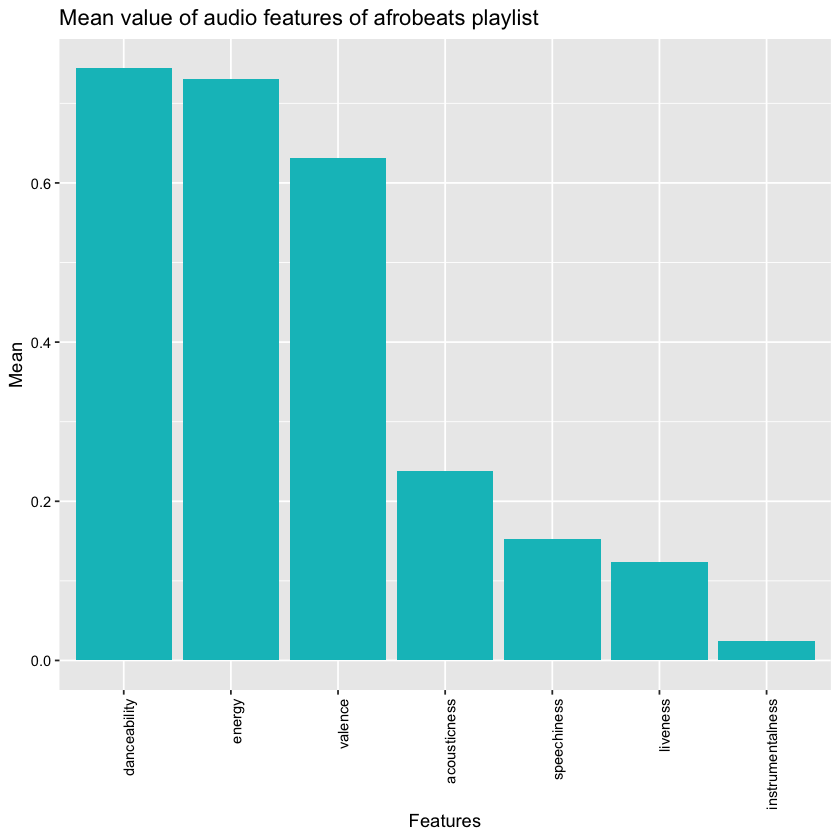

In [3]:
# plot 1.1
# Implicit features
# Mean of features
df.1.i <- df.1.stats[df.1.stats$type == 'i',]

ggplot(df.1.i, aes(x = reorder(feature, -mean), y = mean)) +
  geom_bar(stat='identity', fill = '#00BFC4') +
  theme(axis.text = element_text(colour = 'black')) +
  ggtitle("Mean value of audio features of afrobeats playlist") +
  xlab("Features") +
  ylab("Mean") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

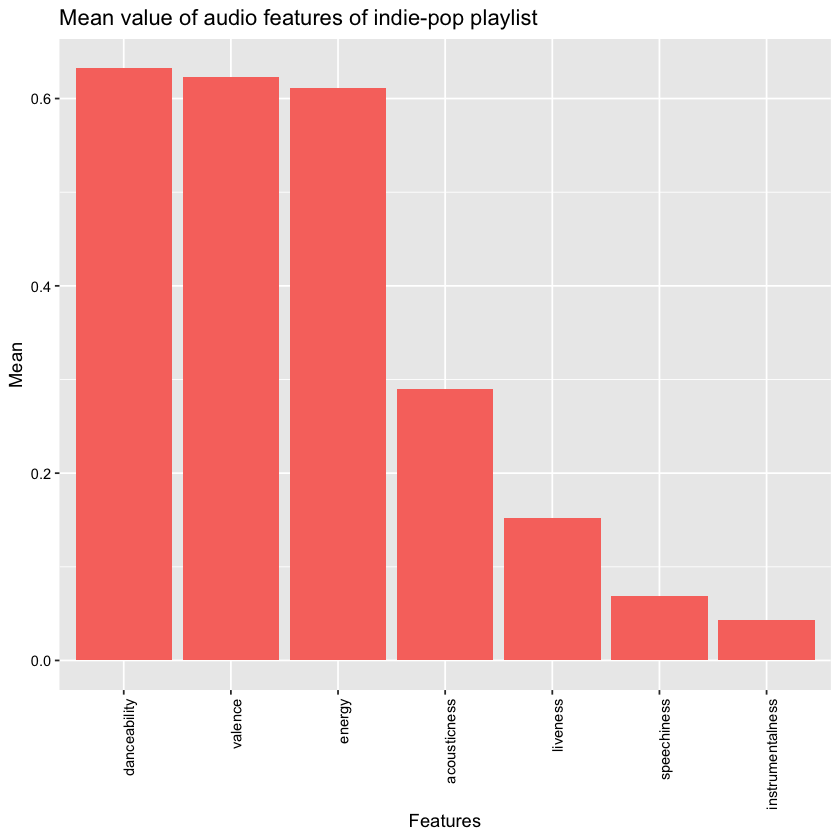

In [5]:
# plot 2.1
df.2.i <- df.2.stats[df.2.stats$type == 'i',]

ggplot(df.2.i, aes(x = reorder(feature, -mean), y = mean)) +
  geom_bar(stat='identity', fill = '#F8766D') +
  theme(axis.text = element_text(colour = 'black')) +
  ggtitle("Mean value of audio features of indie-pop playlist") +
  xlab("Features") +
  ylab("Mean") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

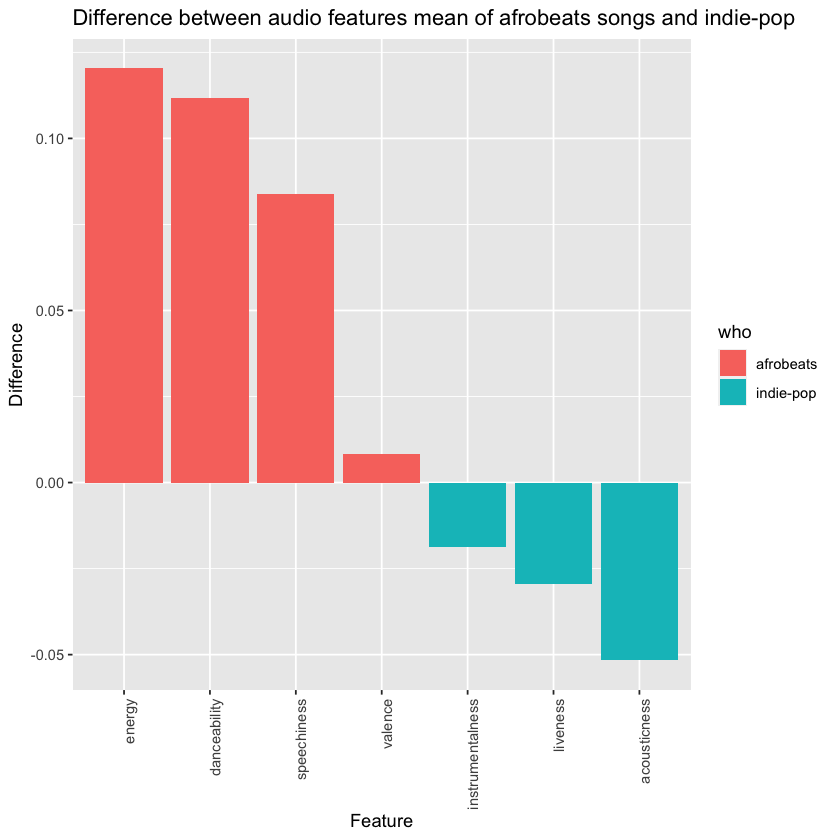

In [6]:
# plot 1.1 vs. 2.1
df.mean.difference <- data.frame(feature = df.1.i$feature,
                                 difference = df.1.i$mean - df.2.i$mean)

df.mean.difference$who <- ifelse(df.mean.difference$difference > 0, 'afrobeats', 'indie-pop')

ggplot(df.mean.difference, aes(x = reorder(feature, -difference), 
                               y = difference, fill = who)) +
  geom_bar(stat='identity') +
  ggtitle("Difference between audio features mean of afrobeats songs and indie-pop") +
  xlab("Feature") +
  ylab("Difference") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

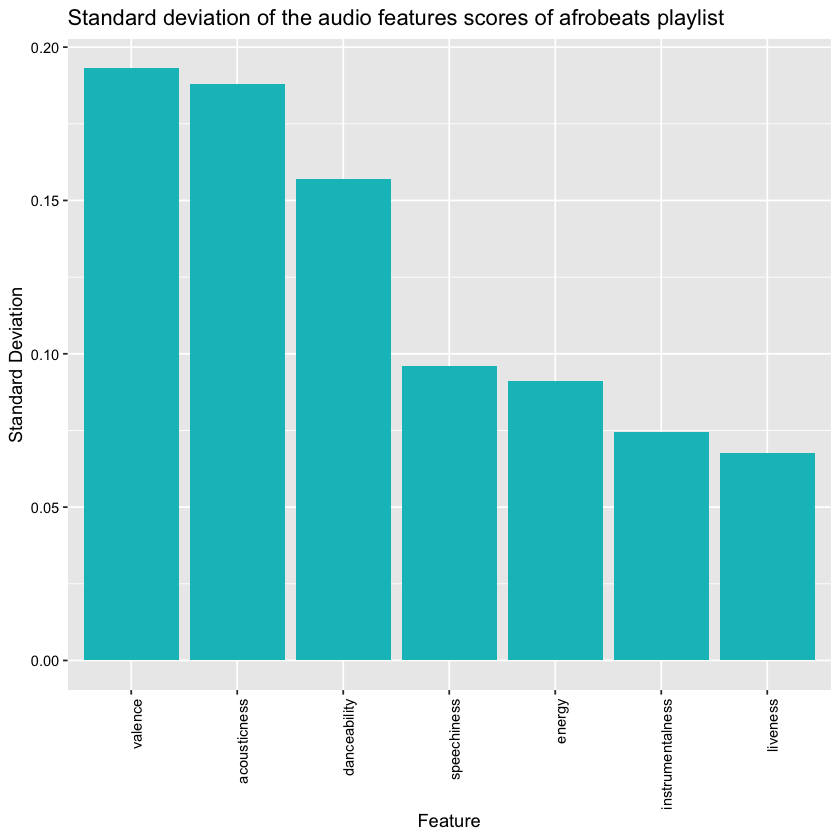

In [7]:
# plot 2.2
# Sparsity, or variety of playlists
ggplot(df.1.i, aes(x = reorder(feature, -sd), y = sd)) +
  geom_bar(stat='identity', fill = '#00BFC4') +
  theme(axis.text = element_text(colour = 'black')) +
  ggtitle("Standard deviation of the audio features scores of afrobeats playlist") +
  xlab("Feature")+
  ylab("Standard Deviation") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

[1] 0.8670629

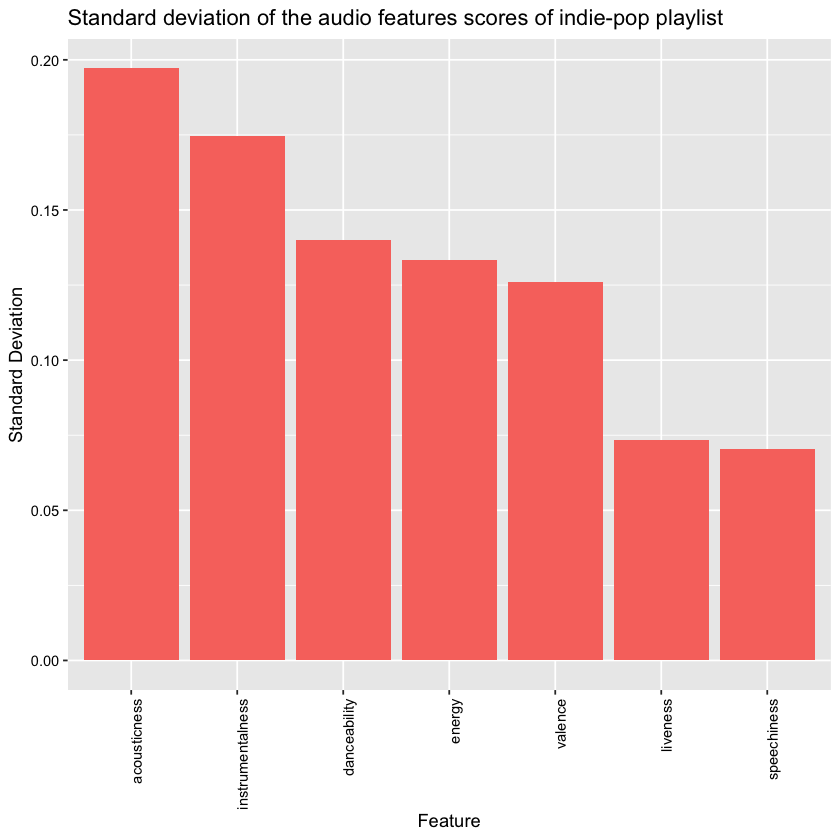

In [8]:
sum(df.1.i$sd)

ggplot(df.2.i, aes(x = reorder(feature, -sd), y = sd)) +
  geom_bar(stat='identity', fill = '#F8766D') +
  theme(axis.text = element_text(colour = 'black')) +
  ggtitle("Standard deviation of the audio features scores of indie-pop playlist") +
  xlab("Feature")+
  ylab("Standard Deviation") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

[1] 0.914773

No id variables; using all as measure variables



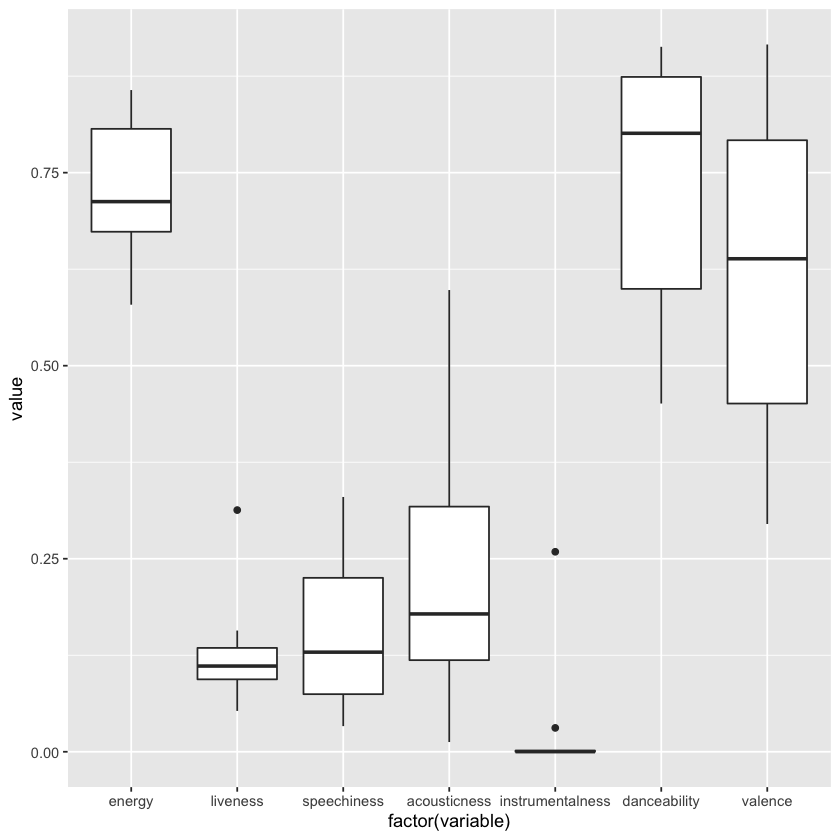

In [9]:
sum(df.2.i$sd)

df.1.long <- df.1[ ,c('energy', 'liveness', 'speechiness', 
                      'acousticness', 'instrumentalness',
                      'danceability', 'valence')]
df.1.long <- melt(df.1.long)

ggplot(df.1.long, aes(factor(variable), value)) + geom_boxplot() 

No id variables; using all as measure variables



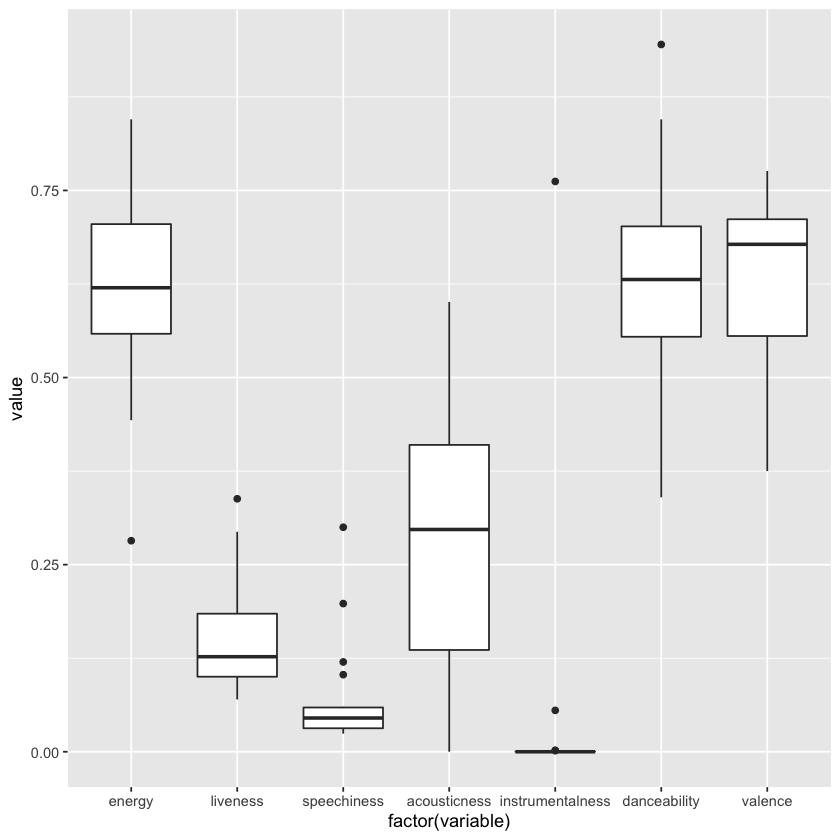

In [10]:
df.2.long <- df.2[ ,c('energy', 'liveness', 'speechiness', 
                      'acousticness', 'instrumentalness',
                      'danceability', 'valence')]
df.2.long <- melt(df.2.long)

ggplot(df.2.long, aes(factor(variable), value)) + geom_boxplot() 

`geom_smooth()` using formula 'y ~ x'



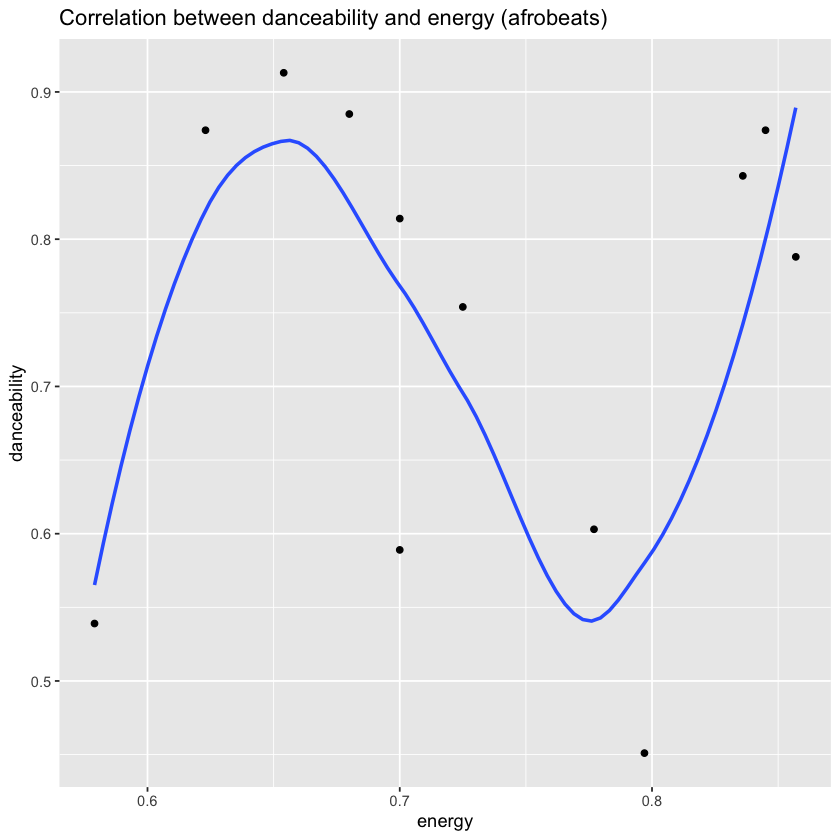

In [11]:
## Correlations
df.1.cor <- cor(df.1[c(1,2,4:6,8,12)])
ggplot(df.1, aes(x = energy, y = danceability)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE) +
  ggtitle("Correlation between danceability and energy (afrobeats)")

`geom_smooth()` using formula 'y ~ x'



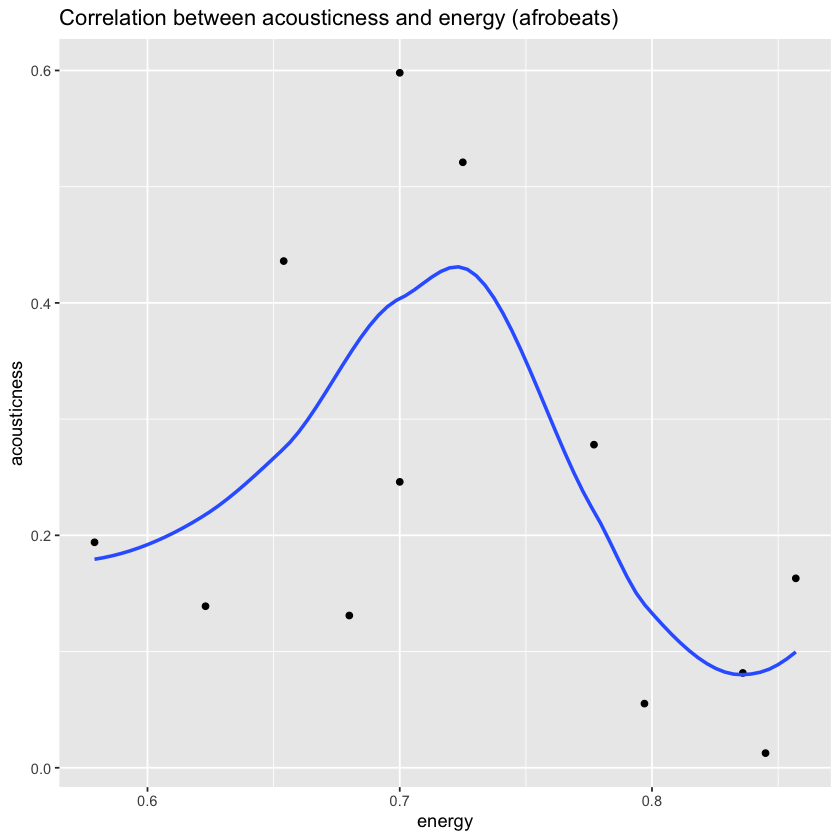

In [12]:
ggplot(df.1, aes(x = energy, y = acousticness)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE) +
  ggtitle("Correlation between acousticness and energy (afrobeats)")

`geom_smooth()` using formula 'y ~ x'



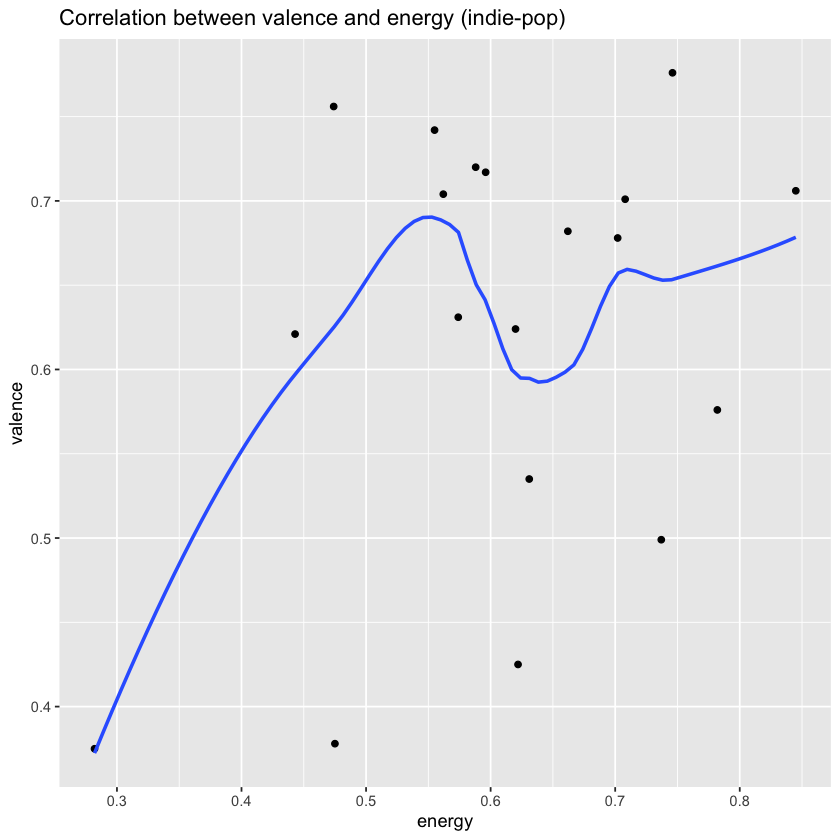

In [13]:
df.2.cor <- cor(df.2[c(1,2,4:6,8,12)])

ggplot(df.2, aes(x = energy, y = valence)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE) +
  ggtitle("Correlation between valence and energy (indie-pop)")

`geom_smooth()` using formula 'y ~ x'



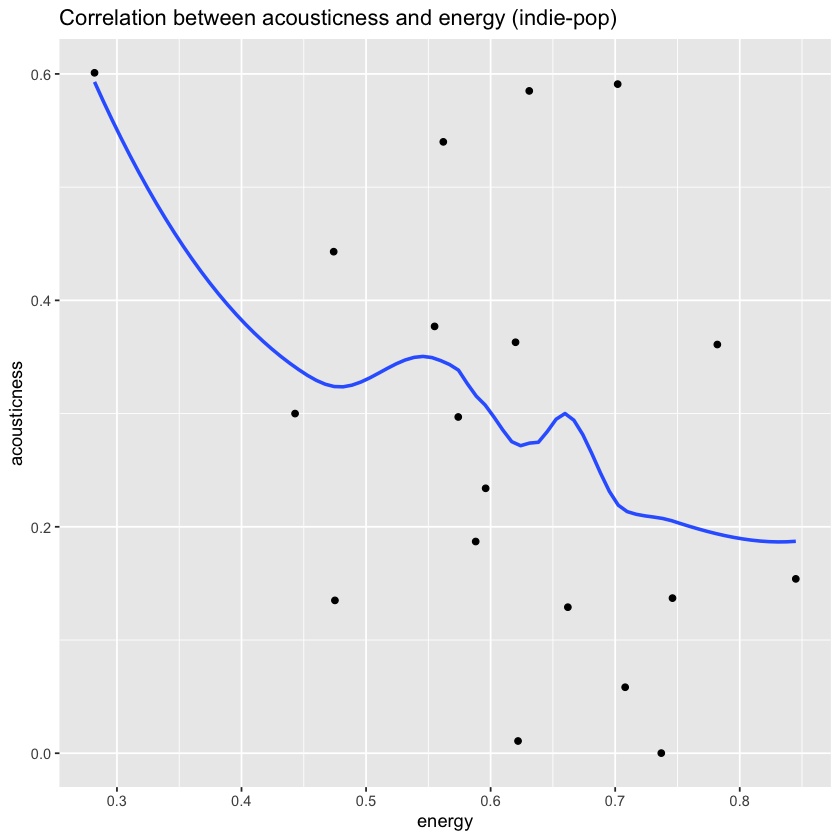

In [14]:
ggplot(df.2, aes(x = energy, y = acousticness)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE) +
  ggtitle("Correlation between acousticness and energy (indie-pop)")


In [24]:
# mean and sd of all scores
mean(as.vector(t(df.1[c(1,2,4:6,8,12)])))

mean(as.vector(t(df.2[c(1,2,4:6,8,12)])))

sd(as.vector(t(df.1[c(1,2,4:6,8,12)])))

sd(as.vector(t(df.2[c(1,2,4:6,8,12)])))

# Boringness

# NOTE: for loudness, the higher the value, the loudest the song

# NOTE: the lowest boringness is, the more boring the song is
boringness <- function(df){
  return ((df$loudness) + (df$energy*100) + (df$danceability*100) + (df$tempo))
}

boring.1 <- data.frame(boringness = boringness(df.1), uri = df.1$uri, who = 'me')
head(arrange(boring.1, (boringness)), 30)
head(arrange(boring.1, desc(boringness)), 30)
summary(boring.1)

ggplot(boring.1, aes(boringness)) +
  geom_histogram() +
  ggtitle("Histogram of the boringness score (afrobeats)")

[1] 0.377922

[1] 0.3458536

[1] 0.3175486

[1] 0.2848913

ERROR: Error in arrange(boring.1, (boringness)): could not find function "arrange"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



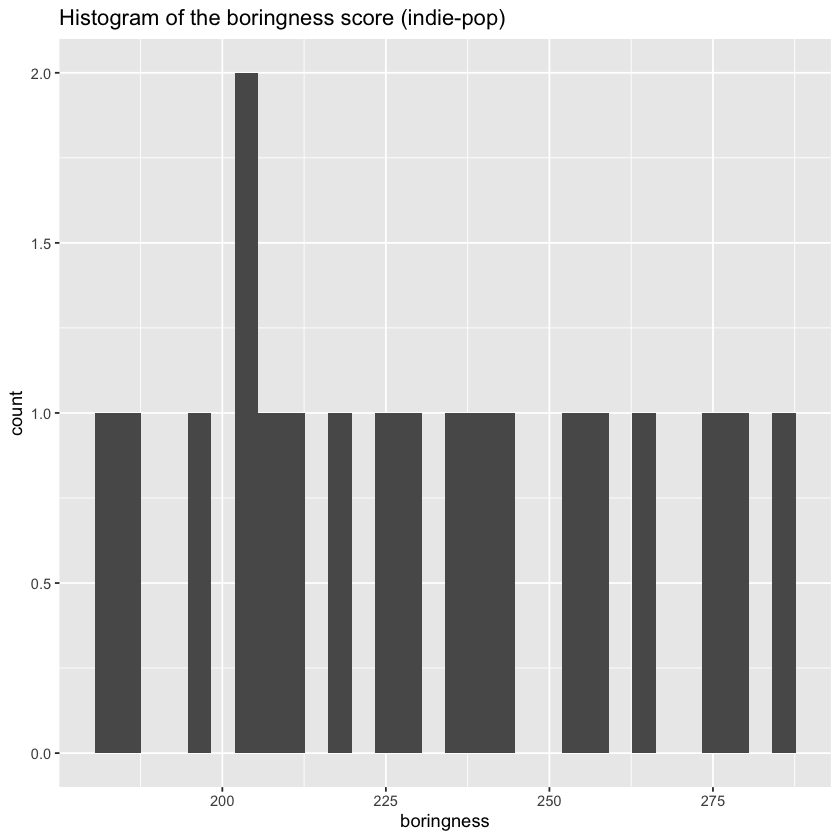

ERROR: Error in arrange(boring.2, (boringness)): could not find function "arrange"


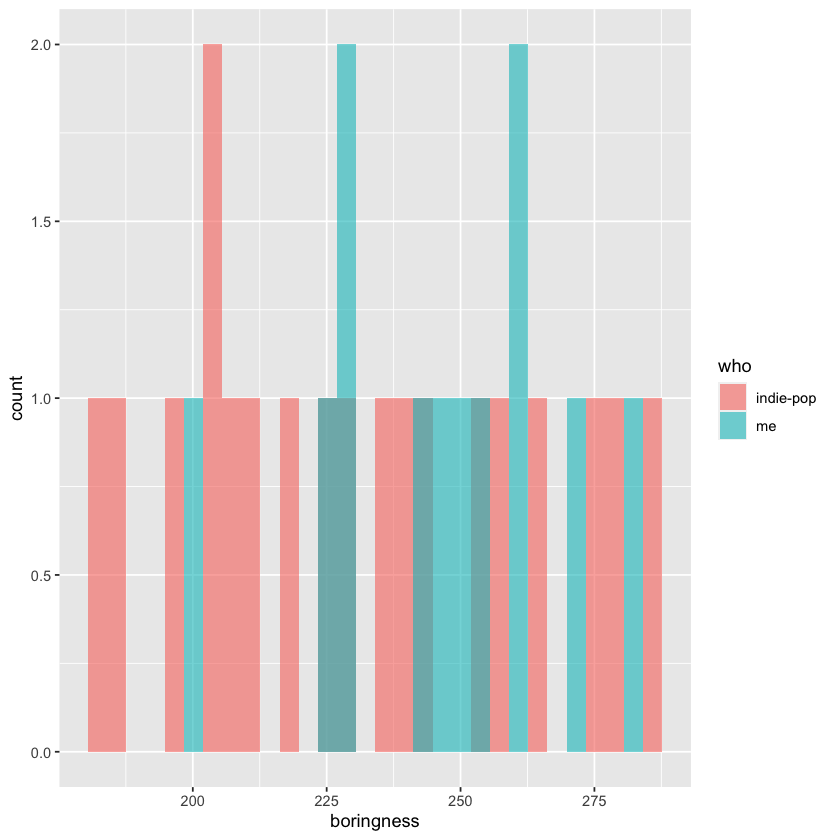

In [25]:
boring.2 <- data.frame(boringness = boringness(df.2), uri = df.2$uri, who = 'indie-pop')

ggplot(boring.2, aes(boringness)) +
  geom_histogram() +
  ggtitle("Histogram of the boringness score (indie-pop)")

boring.total <- rbind(boring.2, boring.1)
ggplot(boring.total, aes(x = boringness, fill = who)) +
  geom_histogram(alpha=0.6, position='identity')

head(arrange(boring.2, (boringness)))
head(arrange(boring.2, desc(boringness)))

summary(boring.2)

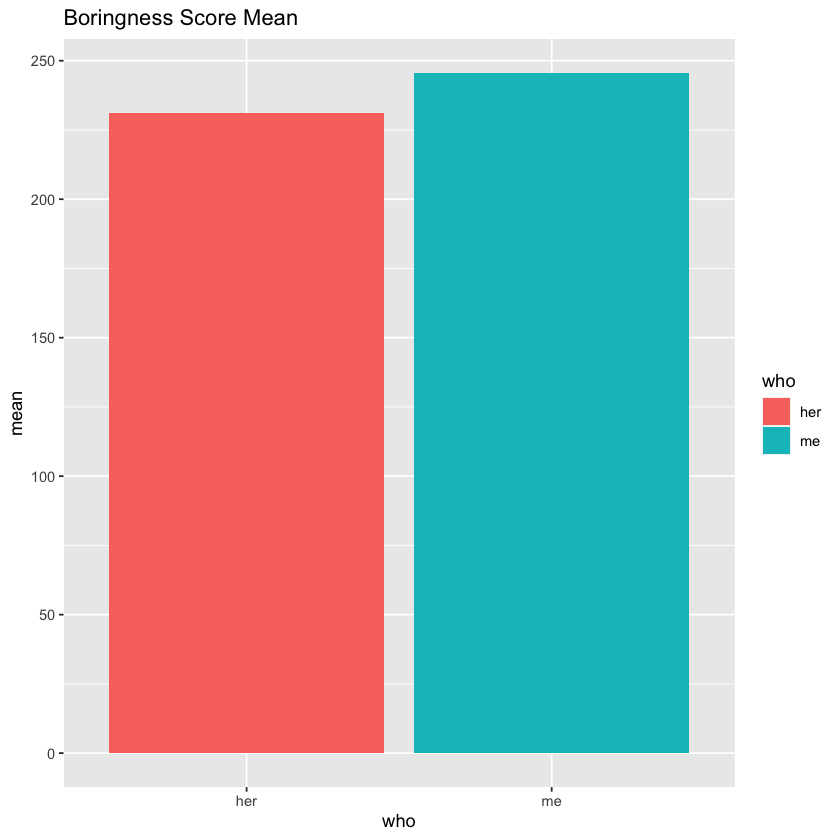

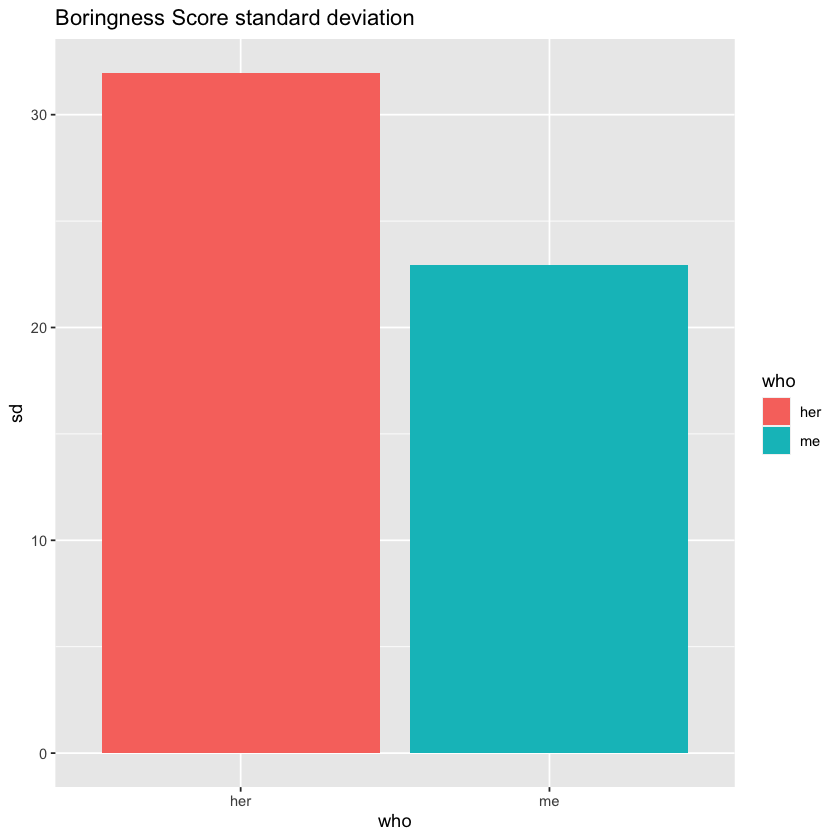

In [26]:
boring.stats <- data.frame(mean = c(mean(boring.1$boringness), mean(boring.2$boringness)),
                           sd = c(sd(boring.1$boringness), sd(boring.2$boringness)),
                           who = c('afrobeats', 'indie-pop'))

ggplot(boring.stats, aes(x = who,y = mean,fill = who)) +
  geom_bar(stat="identity") +
  ggtitle("Boringness Score Mean")

ggplot(boring.stats, aes(x = who,y = sd,fill = who)) +
  geom_bar(stat="identity") +
  ggtitle("Boringness Score standard deviation")

# Write a csv with just the implicit audio features
implicit.1 <- df.1[c('energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'danceability', 'valence')]
implicit.2 <- df.2[c('energy', 'liveness', 'speechiness', 'acousticness', 'instrumentalness', 'danceability', 'valence')]
implicit.1$who <- 'afrobeats'
implicit.2$who <- 'indie-pop'
implicit <- rbind(implicit.1, implicit.2)
write.table(implicit, file='implicit_features.csv', row.names = FALSE, sep=',')